# Tour por Europa

## Autores:
*   Andrea Fernanda Bernal Forero 2201827
*   Miguel Angel Angulo Duarte 2170812
*   Christian Isnardo Orduz Picon 2152104
*   Carlos Andres Gomez Orduz 2202148
*   Juan Esteban Aguilar Rueda 2200187

### NOTA:
Importante instalar la libreria networkx con pip install networkx para ejecutar el código con éxito

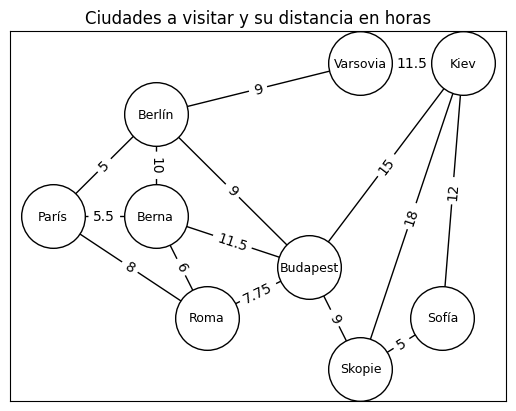



Bienvenido, este es su recorrido:

La duracion total aproximada de la ruta es de 58.75 horas


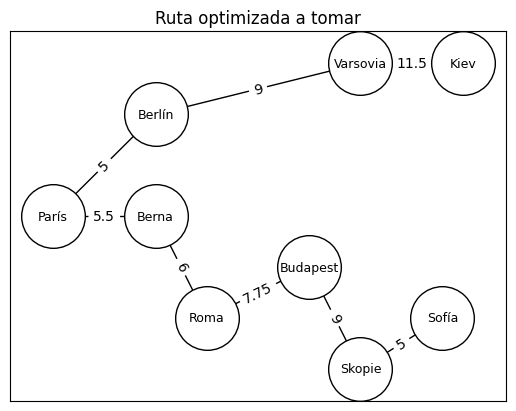

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class MatrizPesos:
    def __init__(self, nodos): #Constructor de una matriz de pesos
        self.V = nodos    #Numero de vertices
        self.A = 0        #Numero de aristas
        self.matrizPesos = [[0] * nodos for _ in range(nodos)]   #Matriz de ponderaciones
    def getV(self):
        return self.V

    def getA(self):
        return self.A

    def getMatrizPesos(self):
        return self.matrizPesos

    def enlazarNodosConPeso(self, u, v, w):    #Metodo que crea una arista entre dos nodos con su peso
        self.matrizPesos[u][v] = w
        self.matrizPesos[v][u] = w
        self.A += 1

    def imprimirMatriz(self):   #Metodo para imprimir la matriz
        for i in range(self.V):
            print(f"{i}: ", end="")
            for j in range(self.V):
                print(f"{self.matrizPesos[i][j]} ", end="")
            print("")

    def completarPesos(self):      #Metodo para completar pesos, es decir, no dejar en 0 aquellos nodos que no se relacionan sino en -1.
        for i in range(self.V):
            for j in range(self.V):
                if self.matrizPesos[i][j] == 0 and j != i:
                    self.matrizPesos[i][j] = -1

class AlgKruskal:
    def __init__(self, matriz, verti):   # Constructor del algoritmo de kruskal
        self.pesoMin = 0         #Peso total minimo del ARM
        self.vectolDestinos = [0] * verti    #Vector que contendra los nodos destino ya recorridos
        self.Matriz = matriz     #Matriz de pesos del grafo
        self.vertices = verti     #Numero de vertices del grafo

    def arbolRecubridorMin(self):  #Metodo del algoritmo que encuentra el ARM
        Grafo2=nx.Graph()  #Creacion del grafico en un plano cartesiano

        pos = {"Kiev": (5, 0.09), "Budapest": (2, 0.05), "Berlín": (-1, 0.08), "París": (-3, 0.06), "Varsovia": (3, 0.09), "Berna":(-1,0.06),
       "Roma":(0,0.04), "Skopie":(3,0.03), "Sofía":(4.6,0.04)}  #Posiciones en el plano de los nodos
        opciones = {   #Detalles de edicion para las fuentes
            "font_size": 9,
            "node_size": 2100,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 1,
            "width": 1,
        }

        a = 100  #Entero que ayudara a establecer la arista con menor peso en el grafo
        c = 0   #Entero que ayudara a saber cuantas veces se repite el proceso del algoritmo
        pro = 0
        dest = 0  #Enteros que me indican la procedencia y destino de la arista escogida
        print("Bienvenido, este es su recorrido:")
        while c < self.vertices - 1:    #Condicion que finaliza el algoritmo cuando el arbol recubridor minimo tenga "v-1" aristas siendo "v" el numero de nodos
            for i in range(self.vertices):
                for j in range(self.vertices):
                    if self.Matriz[i][j]>0  and  self.Matriz[i][j]<a:   #Busco la arista de menor peso en todo el grafo
                        a = self.Matriz[i][j]    # Guardo su ponderacion, nodo destino y origen
                        pro = i
                        dest = j
            if self.Verificar(dest):   #Verifico si el nodo que es destino ya fue recorrido antes
                if not self.Verificar(pro):  #Ahora verifico si el nodo origen de la arista tambien fue recorrido antes
                    self.vectolDestinos[c] = pro   #Añado el nodo origen al vector de destinos en caso de que no este
                    self.Matriz[pro][dest] = 0  #"Elimino" esa arista pues ya se que es la de menor peso, no la necesito mas; tengo guardado sus nodos y peso
                    self.Matriz[dest][pro] = 0
                    c += 1  #Aumento el numero de aristas del ARM
                    self.pesoMin += a  #Sumo el peso de la arista al peso del ARM
                    Grafo2.add_edge(dc[pro], dc[dest],weight=a) #Agrego los nodos, arista y peso al nuevo grafo que representara la solucion del problema
                    a = 100  #Inicializo otra vez en 100 para repetir el proceso de busqueda
                else:    #Si salto a este condicional quiere decir que la arista seleccionada me generaba un ciclo
                    self.Matriz[pro][dest] = 0  #Elimino la arista
                    self.Matriz[dest][pro] = 0
                    a = 100 #Inicializo otra vez en 100 para repetir el proceso de busqueda
            else:
                self.vectolDestinos[c] = dest   #Como el nodo destino no se encontraba entre los nodos ya recorridos, lo agrego
                self.Matriz[pro][dest] = 0   #"Elimino" esa arista pues ya se que es la de menor peso, no la necesito mas; tengo guardado sus nodos y peso
                self.Matriz[dest][pro] = 0
                c += 1  #Aumento el numero de aristas del ARM
                self.pesoMin += a   #Sumo el peso de la arista al peso del ARM
                Grafo2.add_edge(dc[pro], dc[dest],weight=a)  #Agrego los nodos, arista y peso al nuevo grafo que representara la solucion del problema
                a = 100  #Inicializo otra vez en 100 para repetir el proceso de busqueda
        print("")
        print("La duracion total aproximada de la ruta es de " + str(self.pesoMin)+" horas")
        nx.draw_networkx(Grafo2, pos, **opciones)    #Metodos de la libreria networkX para imprimir el grafo en pantalla
        labels = nx.get_edge_attributes(Grafo2, 'weight')
        nx.draw_networkx_edge_labels(Grafo2, pos, edge_labels=labels)
        plt.title("Ruta optimizada a tomar")
        plt.show()

    def Verificar(self, destino):  #Metodo que me permite verificar si un nodo ya fue destino antes
        for i in range(len(self.vectolDestinos)):
            if destino == self.vectolDestinos[i]:
                return True
        return False

# ---------------------//------------------ Ejecución del programa principal--------//-----------//--------------//----------------//----------//-----//

#Grafica del grafo "mapa" original
Grafo = nx.Graph()
Grafo.add_edge("Kiev", "Varsovia",weight=11.5)
Grafo.add_edge("Kiev", "Budapest",weight=15)
Grafo.add_edge("Kiev", "Skopie",weight=18)
Grafo.add_edge("Kiev", "Sofía",weight=12)
Grafo.add_edge("Varsovia", "Berlín",weight=9)
Grafo.add_edge("Sofía", "Skopie",weight=5)
Grafo.add_edge("Skopie", "Budapest",weight=9)
Grafo.add_edge("Budapest", "Berna",weight=11.5)
Grafo.add_edge("Budapest", "Berlín",weight=9)
Grafo.add_edge("Budapest", "Roma",weight=7.75)
Grafo.add_edge("Berlín", "Berna",weight=10)
Grafo.add_edge("Berna", "Roma", weight=6)
Grafo.add_edge("Berlín", "París",weight=5)
Grafo.add_edge("París", "Berna",weight=5.5)
Grafo.add_edge("París", "Roma",weight=8)

pos = {"Kiev": (5, 0.09), "Budapest": (2, 0.05), "Berlín": (-1, 0.08), "París": (-3, 0.06), "Varsovia": (3, 0.09), "Berna":(-1,0.06),
       "Roma":(0,0.04), "Skopie":(3,0.03), "Sofía":(4.6,0.04)}  #Posiciones en el plano de los nodos

opciones = {   #Detalles de edicion para las fuentes
    "font_size": 9,
    "node_size": 2100,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw_networkx(Grafo, pos, **opciones)   #Metodos de la libreria networkX para imprimir el grafo en pantalla
labels = nx.get_edge_attributes(Grafo, 'weight')
nx.draw_networkx_edge_labels(Grafo, pos, edge_labels=labels)
plt.title("Ciudades a visitar y su distancia en horas")
plt.show()
print("")

#Creacion del grafo para luego efectuar el algoritmo
matriz = MatrizPesos(9)  #Creacion de la matriz de pesos con el numero de nodos (ciudades) ya conocido
dc = {0:"Kiev",1:"Varsovia",2:"Berlín",3:"Berna",4:"París",
      5:"Roma",6:"Budapest",7:"Skopie",8:"Sofía"} #Diccionario que relaciona un entero con una ciudad para facilitar el proceso del algoritmo de kruskal
#Se relacionan los nodos y sus pesos
matriz.enlazarNodosConPeso(0,1,11.5)
matriz.enlazarNodosConPeso(0,6,15)
matriz.enlazarNodosConPeso(0,8,12)
matriz.enlazarNodosConPeso(0,7,18)
matriz.enlazarNodosConPeso(1,2,9)
matriz.enlazarNodosConPeso(2,3,10)
matriz.enlazarNodosConPeso(2,6,9)
matriz.enlazarNodosConPeso(2,4,5)
matriz.enlazarNodosConPeso(3,4,5.5)
matriz.enlazarNodosConPeso(3,6,11.5)
matriz.enlazarNodosConPeso(3,5,6)
matriz.enlazarNodosConPeso(4,5,8)
matriz.enlazarNodosConPeso(5,6,7.75)
matriz.enlazarNodosConPeso(6,7,9)
matriz.enlazarNodosConPeso(7,8,5)
Algoritmo = AlgKruskal(matriz.matrizPesos,matriz.V)  #Creacion de un Kruskal para el grafo desarrollado
print("")
Algoritmo.arbolRecubridorMin()    #Inicio del proceso de busqueda del ARM
print("")